Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Example 6.14

Clustering of height data from a population consisting of both men and women, without knowing the sex of each person.\
Topics and relevant videos: [Gaussian mixture model, expectation maximization algorithm, clustering, unsupervised learning](https://www.youtube.com/watch?v=4g5kWmrqnN8)

Author: Carlos Fernandez-Granda\
Data source: http://mreed.umtri.umich.edu/mreed/downloads.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm
import matplotlib 
# matplotlib.rcParams['text.usetex'] = True

font_size = 15
font_size_legend = 15
font_size_ticks = 15

# data_men = pd.read_csv ("../data/ANSUR II MALE Public.csv", encoding='latin-1')
# data_women = pd.read_csv ("../data/ANSUR II FEMALE Public.csv", encoding='latin-1')

# Raw GitHub URLs
url_men = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/ANSUR%20II%20MALE%20Public.csv"
url_women = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/ANSUR%20II%20FEMALE%20Public.csv"

# Load data with specified encoding
data_men = pd.read_csv(url_men, encoding='latin-1')
data_women = pd.read_csv(url_women, encoding='latin-1')

stature_men = data_men['stature'] / 10.
stature_women = data_women['stature'] / 10.
stature = np.concatenate((stature_men,stature_women))

# The "true" parameters are those that we would obtain by fitting Gaussian parametric models to the data of each sex
true_alpha = len(stature_women)/len(stature)
true_mu_1 = np.mean(stature_women)
true_sigma_1 = np.std(stature_women)
true_mu_0 = np.mean(stature_men)
true_sigma_0 = np.std(stature_men)

In [2]:
# Expectation maximization algorithm for fitting a Gaussian mixture model to the height data without knowing the sex
n_iter = 1500

# Initialize parameters
n = len(stature)
alpha = np.zeros(n_iter)
mu = np.zeros((n_iter,2))
sigma = np.zeros((n_iter,2))
loglikelihood = np.zeros(n_iter)

alpha[0] = 0.5
mu[0,0] = np.mean(stature) + 1
mu[0,1] = np.mean(stature) - 1
sigma[0,0] = np.std(stature)
sigma[0,1] = np.std(stature)

gamma_0_aux = (1-alpha[0]) * norm.pdf(stature,mu[0,0],sigma[0,0])
gamma_1_aux = alpha[0] * norm.pdf(stature,mu[0,1],sigma[0,1])
gamma_sum = gamma_0_aux + gamma_1_aux
gamma_0 = gamma_0_aux / gamma_sum
gamma_1 = gamma_1_aux / gamma_sum 
    
for ind in range(n_iter):
    L_0 = (1-alpha[ind]) * norm.pdf(stature,mu[ind,0],sigma[ind,0])
    L_1 = alpha[ind] * norm.pdf(stature,mu[ind,1],sigma[ind,1])
    L = L_0 + L_1
    gamma_0 = L_0 / L
    gamma_1 = L_1 / L 
    
    loglikelihood[ind] = np.sum(np.log(L))
    
    if np.mod(ind,100) == 0:
        print("Iteration: " + str(ind))
        print("mu_0 = " + str(round(mu[ind,0],2)) + " sigma_0: " + str(round(sigma[ind,0],2))
              + " mu_1 = " + str(round(mu[ind,1],2)) + " sigma_1: " + str(round(sigma[ind,1],2))
              + " alpha_1 =" + str(round(alpha[ind],3)))
        print("log-likelihood: " + str(round(loglikelihood[ind],2)))
    
    if ind < n_iter - 1:
        
        n_0 = np.sum(gamma_0)
        n_1 = np.sum(gamma_1)
        alpha[ind+1] = n_1 / n
        mu[ind+1,0] = np.sum(gamma_0 * stature) / n_0
        mu[ind+1,1] = np.sum(gamma_1 * stature) / n_1
        sigma[ind+1,0] = np.sqrt( np.sum( gamma_0 * (stature - mu[ind+1,0])**2 ) / n_0 )
        sigma[ind+1,1] = np.sqrt( np.sum( gamma_1 * (stature - mu[ind+1,1])**2 ) / n_1 )

Iteration: 0
mu_0 = 172.44 sigma_0: 9.0 mu_1 = 170.44 sigma_1: 9.0 alpha_1 =0.5
log-likelihood: -21943.62
Iteration: 100
mu_0 = 177.07 sigma_0: 6.67 mu_1 = 166.26 sigma_1: 7.65 alpha_1 =0.521
log-likelihood: -21912.56
Iteration: 200
mu_0 = 176.76 sigma_0: 6.64 mu_1 = 165.09 sigma_1: 7.15 alpha_1 =0.456
log-likelihood: -21909.94
Iteration: 300
mu_0 = 176.21 sigma_0: 6.78 mu_1 = 164.12 sigma_1: 6.81 alpha_1 =0.395
log-likelihood: -21908.12
Iteration: 400
mu_0 = 175.69 sigma_0: 6.93 mu_1 = 163.22 sigma_1: 6.5 alpha_1 =0.341
log-likelihood: -21906.59
Iteration: 500
mu_0 = 175.25 sigma_0: 7.08 mu_1 = 162.46 sigma_1: 6.23 alpha_1 =0.298
log-likelihood: -21905.53
Iteration: 600
mu_0 = 174.94 sigma_0: 7.2 mu_1 = 161.91 sigma_1: 6.05 alpha_1 =0.268
log-likelihood: -21904.99
Iteration: 700
mu_0 = 174.74 sigma_0: 7.27 mu_1 = 161.58 sigma_1: 5.93 alpha_1 =0.251
log-likelihood: -21904.79
Iteration: 800
mu_0 = 174.64 sigma_0: 7.32 mu_1 = 161.41 sigma_1: 5.87 alpha_1 =0.242
log-likelihood: -21904.73


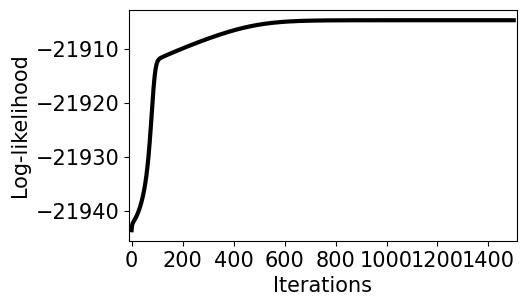

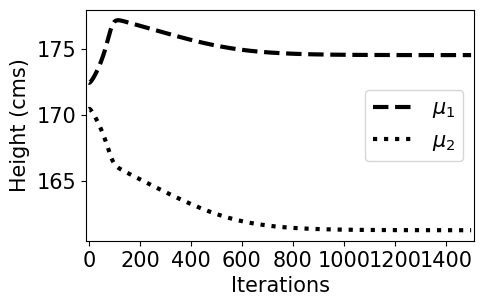

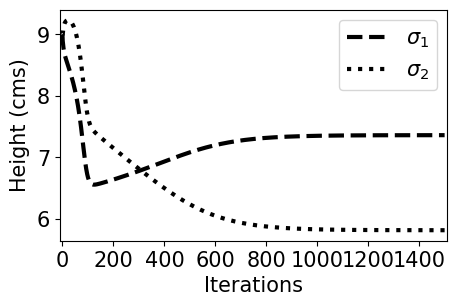

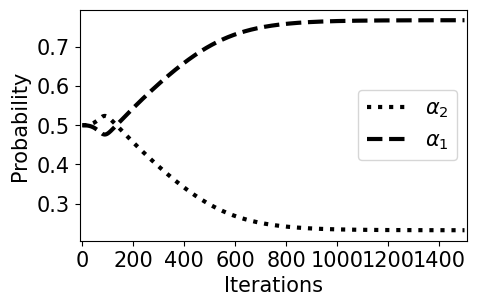

In [3]:
# Convergence of the parameters in the Gaussian mixture models
# They are quite similar to those of the Gaussian models for each sex, 
# indicating that the algorithm approximately clusters the two sexes automatically
xmin = -10
xmax = n_iter + 10

plt.figure(figsize=(5,3))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks([-21940,-21930,-21920,-21910],fontsize=font_size_ticks)
plt.plot(range(n_iter),loglikelihood,color="black",lw=3)
plt.xlim([xmin,xmax])
plt.ylabel("Log-likelihood",fontsize=font_size)
plt.xlabel("Iterations",fontsize=font_size)

plt.figure(figsize=(5,3))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks([160,165,170,175],fontsize=font_size_ticks)
plt.plot(range(n_iter),mu[:,0],color="black",lw=3,ls="dashed",label=r"$\mu_1$")
plt.plot(range(n_iter),mu[:,1],color="black",lw=3,ls="dotted",label=r"$\mu_2$")
plt.xlim([xmin,xmax])
plt.xlabel("Iterations",fontsize=font_size)
plt.ylabel('Height (cms)',fontsize=font_size,labelpad=5)
plt.legend(fontsize=font_size,loc="center right")

plt.figure(figsize=(5,3))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks([6,7,8,9],fontsize=font_size_ticks)
plt.plot(range(n_iter),sigma[:,0],color="black",lw=3,ls="dashed",label=r"$\sigma_1$")
plt.plot(range(n_iter),sigma[:,1],color="black",lw=3,ls="dotted",label=r"$\sigma_2$")
plt.xlim([xmin,xmax])
plt.xlabel("Iterations",fontsize=font_size)
plt.ylabel('Height (cms)',fontsize=font_size,labelpad=5)
plt.legend(fontsize=font_size)

plt.figure(figsize=(5,3))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(range(n_iter),alpha,color="black",lw=3,ls="dotted",label=r"$\alpha_2$")
plt.plot(range(n_iter),1-alpha,color="black",lw=3,ls="dashed",label=r"$\alpha_1$")
plt.xlim([xmin,xmax])
plt.ylabel('Probability',fontsize=font_size,labelpad=5)
plt.xlabel("Iterations",fontsize=font_size)
plt.legend(fontsize=font_size,loc="center right");

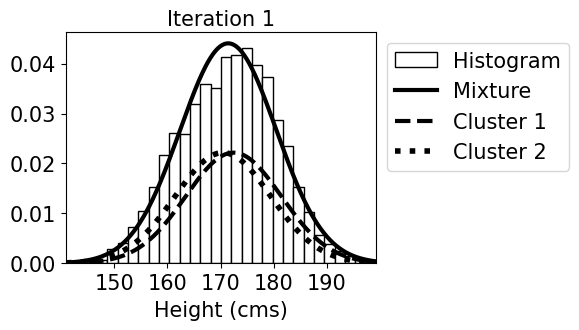

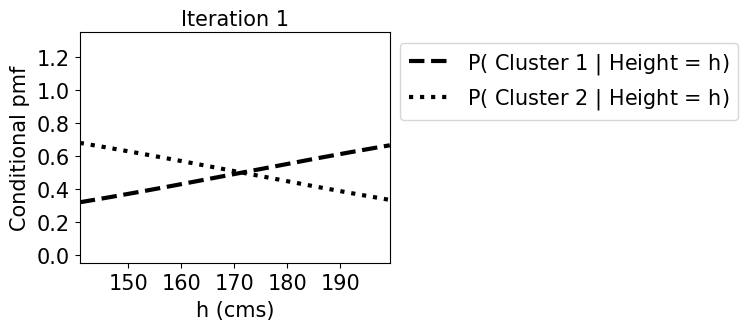

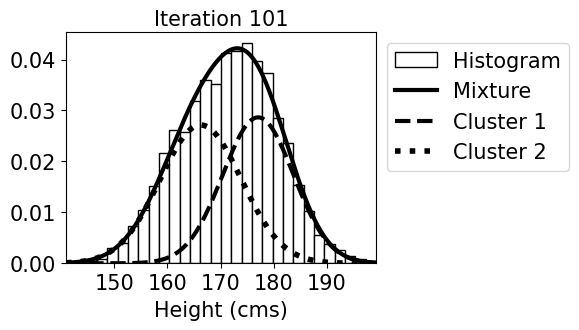

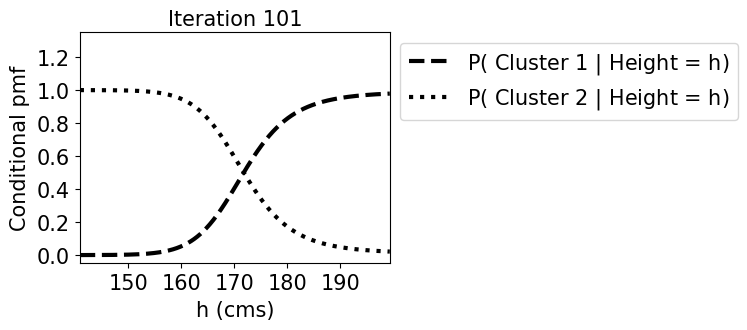

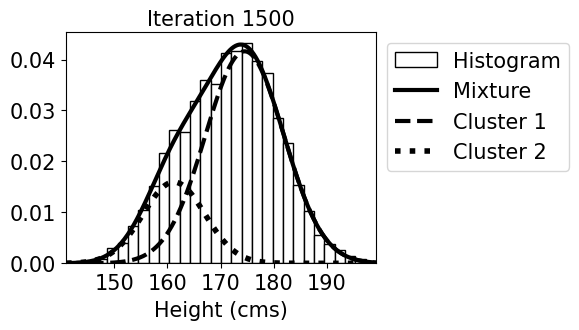

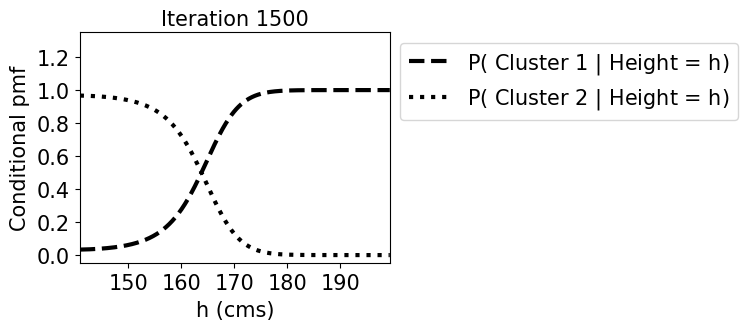

In [4]:
n_bins = 30
hmin = stature.min()
hmax = stature.max()
h = np.linspace(hmin,hmax,500)

for ind in [0,100,1500-1]:

    marginal_pdf = (1-alpha[ind])*norm.pdf(h,mu[ind,0],sigma[ind,0])+alpha[ind]*norm.pdf(h,mu[ind,1],sigma[ind,1])

    plt.figure(figsize=(4,3))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.hist(stature,bins=n_bins,color='white', edgecolor='black',
              linewidth=1,density=True,label='Histogram')
    plt.plot(h,marginal_pdf,lw=3,color="black",label='Mixture')
    plt.plot(h,(1-alpha[ind])*norm.pdf(h,mu[ind,0],sigma[ind,0]),lw=3,color="black",ls="dashed",label='Cluster 1')
    plt.plot(h,alpha[ind]*norm.pdf(h,mu[ind,1],sigma[ind,1]),lw=4,color="black",ls="dotted",label='Cluster 2')
    plt.xlim([hmin,hmax])
    plt.xlabel('Height (cms)',fontsize=font_size,labelpad=5)
    plt.legend(fontsize=font_size,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.title("Iteration "+str(ind + 1),fontsize=font_size,pad=5)
    
    cluster0_given_stature = (1-alpha[ind])*norm.pdf(h,mu[ind,0],sigma[ind,0]) / marginal_pdf
    cluster1_given_stature =  alpha[ind]*norm.pdf(h,mu[ind,1],sigma[ind,1])/ marginal_pdf

    plt.figure(figsize=(4,3))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.plot(h,cluster0_given_stature,color="black",lw=3,ls="dashed",label='P( Cluster 1 $|$ Height = h)')
    plt.plot(h,cluster1_given_stature,color="black",lw=3,ls="dotted",label='P( Cluster 2 $|$ Height = h)')
    plt.xlim([hmin,hmax])
    plt.ylim([-0.05,1.35])
    plt.ylabel(r"Conditional pmf",fontsize=font_size,labelpad=5)
    plt.xlabel('h (cms)',fontsize=font_size,labelpad=5)
    plt.legend(fontsize=font_size,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.title("Iteration "+str(ind + 1),fontsize=font_size,pad=5);